In [1]:
import numpy as np
import pandas as pd 

In [31]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# !pip install pmdarima

In [4]:
data= pd.read_csv("https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv")

In [5]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3201 non-null   object 
 1   Open       3201 non-null   float64
 2   High       3201 non-null   float64
 3   Low        3201 non-null   float64
 4   Close      3201 non-null   float64
 5   Adj Close  3201 non-null   float64
 6   Volume     3201 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 175.2+ KB


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.set_index("Date")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-16,0.049510,0.049510,0.049510,0.049510,0.049510,0
2010-07-17,0.049510,0.085850,0.059410,0.085840,0.085840,5
2010-07-18,0.085840,0.093070,0.077230,0.080800,0.080800,49
2010-07-19,0.080800,0.081810,0.074260,0.074740,0.074740,20
2010-07-20,0.074740,0.079210,0.066340,0.079210,0.079210,42
...,...,...,...,...,...,...
2019-04-16,5212.810059,5270.759766,5190.810059,5236.259766,5236.259766,194699629
2019-04-17,5236.259766,5317.779785,5232.990234,5289.750000,5289.750000,187312150
2019-04-18,5289.750000,5353.009766,5212.180176,5295.529785,5295.529785,158699049


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

In [10]:
data.shape

(3201, 7)

Text(0, 0.5, 'Close Price (USD)')

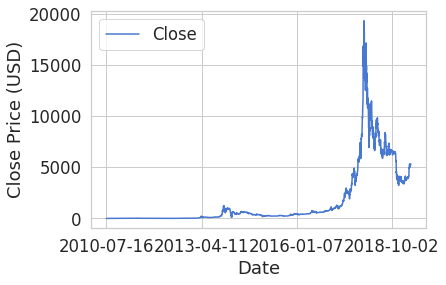

In [11]:
ax = data.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

## Visualize the stock’s daily closing price.

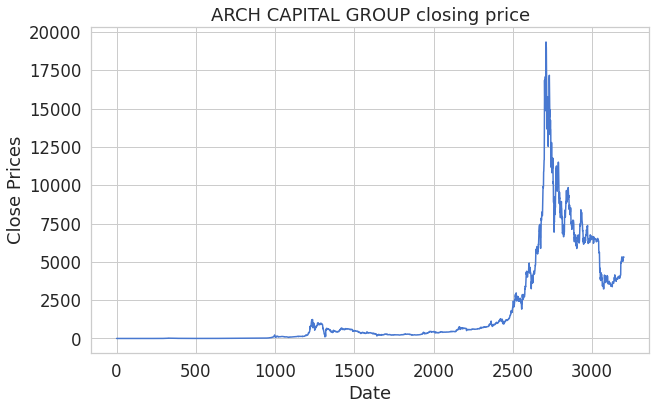

In [12]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show() 

## We can also use a probability distribution to visualize the data in our series.

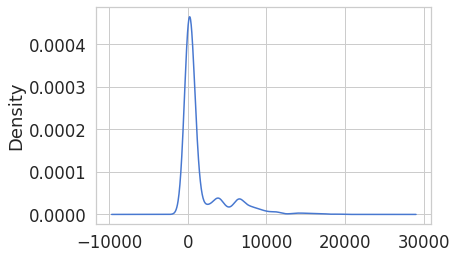

In [13]:
#Distribution of the dataset
df_close = data['Close']
df_close.plot(kind='kde')

## The following are the components’ definitions:
- The average value in the series is called the level.
- The increasing or falling value in the series is referred to as the trend.
- Seasonality is the series’ recurring short-term cycle.
- The random variance in the series is referred to as noise.

-  A time series is also regarded to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.


## ADF

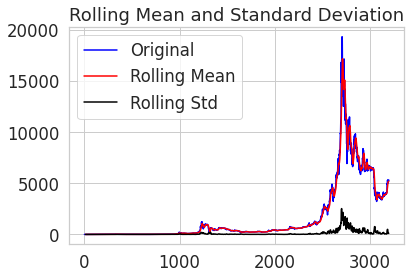

Results of dickey fuller test
Test Statistics                  -1.721675
p-value                           0.419981
No. of lags used                 29.000000
Number of observations used    3171.000000
critical value (1%)              -3.432414
critical value (5%)              -2.862452
critical value (10%)             -2.567255
dtype: float64


In [14]:
from statsmodels.tsa.stattools import adfuller
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

The increasing mean and standard deviation may be seen in the graph above, indicating that our series isn’t stationary.

We can’t rule out the Null hypothesis because the p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

Seasonality and trend may need to be separated from our series before we can undertake a time series analysis. This approach will cause the resulting series to become stagnant.

Let’s isolate the time series from the Trend and Seasonality

<Figure size 432x288 with 0 Axes>

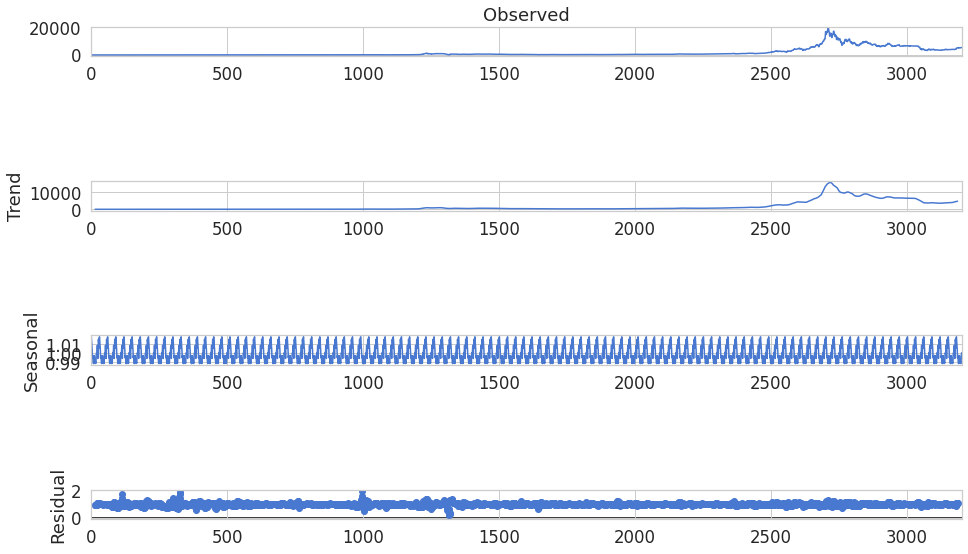

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(np.asarray(df_close.values), model='multiplicative',period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

To reduce the magnitude of the values and the growing trend in the series, we first take a log of the series. We then calculate the rolling average of the series after obtaining the log of the series. A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

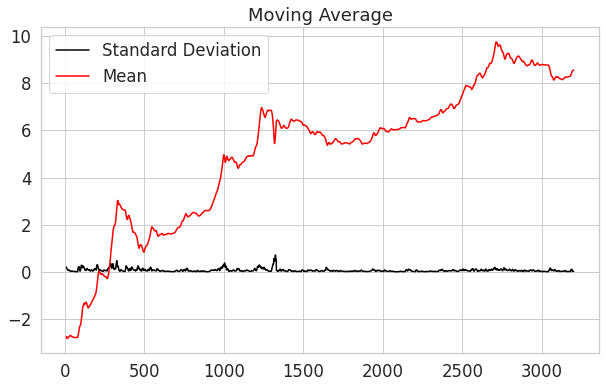

In [16]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we’ll develop an ARIMA model and train it using the stock’s closing price from the train data. So, let’s visualize the data by dividing it into training and test sets.



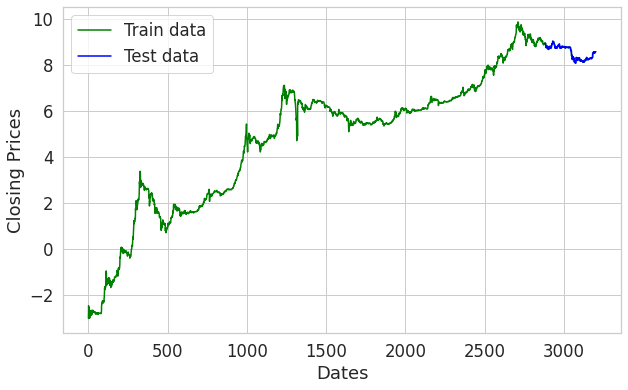

In [17]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

It’s time to choose the ARIMA model’s p,q, and d parameters. We chose the values of p,d, and q last time by looking at the ACF and PACF charts, but this time we’ll utilize Auto ARIMA to find the best parameters without looking at the ACF and PACF graphs.

Auto ARIMA: Automatically discover the optimal order for an ARIMA model.
The auto_arima function returns a fitted ARIMA model after determining the most optimal parameters for an ARIMA model. This function is based on the forecast::auto. Arima R function, which is widely used.

The auro_arima function works by performing differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller, or Phillips–Perron) to determine the order of differencing, d, and then fitting models within start p, max p, start q, max q ranges. After conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D, auto_arima also seeks to identify the optimal P and Q hyper-parameters if the seasonal option is enabled.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7174.571, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7175.468, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7177.082, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7167.029, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7201.957, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7267.530, Time=1.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7269.408, Time=0.92 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-7267.672, Time=5.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-7265.553, Time=3.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-7258.412, Time=0.76 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 13.984 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2877
Model:               SARIMAX(2, 1, 0)   Log Likelih

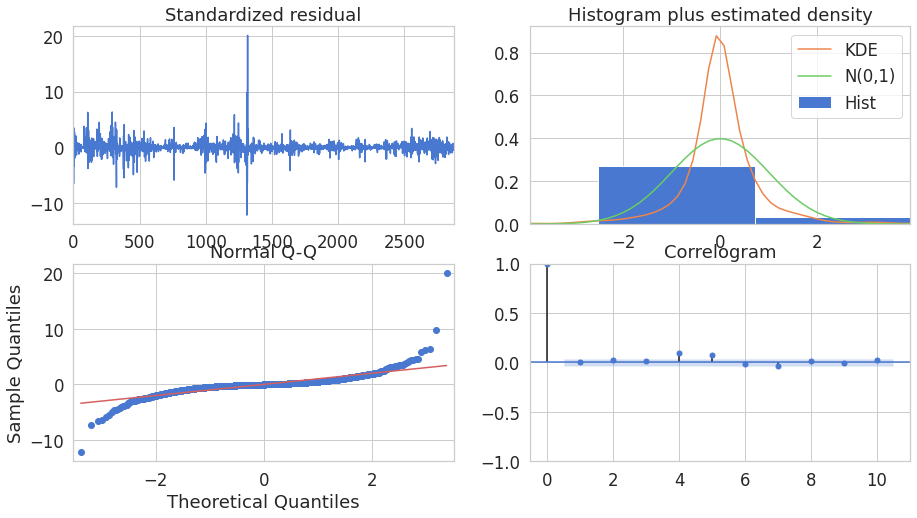

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

So, how should the plot diagnostics be interpreted?
Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.
Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

As a result, the Auto ARIMA model assigned the values 1, 1, and 2 to, p, d, and q, respectively.

In [35]:
import statsmodels.api as sm
#Modeling
# Build Model

model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2877
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3623.961
Date:                Sat, 18 Feb 2023   AIC                          -7239.923
Time:                        04:47:40   BIC                          -7216.066
Sample:                             0   HQIC                         -7231.323
                               - 2877                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0356      0.074     -0.482      0.630      -0.180       0.109
ma.L1          0.0800      0.074      1.078      0.281      -0.065       0.225
ma.L2         -0.1442      0.007    -20.859      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Let’s now begin forecasting stock prices on the test dataset with a 95% confidence level.

In [40]:
# Forecast
#fc, se, conf = fitted.forecast(321)  # 95% conf
pred= fitted.forecast(321,alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(pred, index=test_data.index)



In [41]:
fc_series

2880    8.920707
2881    8.924566
2882    8.924428
2883    8.924433
2884    8.924433
          ...   
3196    8.924433
3197    8.924433
3198    8.924433
3199    8.924433
3200    8.924433
Name: predicted_mean, Length: 321, dtype: float64

In [43]:
# report performance
mse = mean_squared_error(test_data, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.2162646240404805
MAE: 0.3775238325056766
RMSE: 0.4650426045433692
MAPE: 0.045229818140530134


## With a MAPE of around 2.5%, the model is 97.5% accurate in predicting the next 15 observations.